<a href="https://colab.research.google.com/github/hammadkhann/Effective-Dense-Retrieval/blob/main/MS_MARCO_Effective_Dense_Passage_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Pyterrier**

In [1]:
!pip -q install python-terrier
import pyterrier as pt
pt.init()

     |████████████████████████████████| 95 kB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 33.4 MB/s 
     |████████████████████████████████| 69 kB 7.1 MB/s 
     |████████████████████████████████| 222 kB 46.3 MB/s 
     |████████████████████████████████| 596 kB 39.5 MB/s 
     |████████████████████████████████| 126 kB 44.1 MB/s 
     |████████████████████████████████| 72 kB 1.5 MB/s 
     |████████████████████████████████| 294 kB 43.1 MB/s 
     |████████████████████████████████| 1.8 MB 34.6 MB/s 
     |████████████████████████████████| 6.3 MB 19.6 MB/s 
     |████████████████████████████████| 291 kB 46.3 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
from google.colab import drive
from pyterrier.measures import *

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# **Preparing testing dataset**

In [3]:
br = pt.BatchRetrieve.from_dataset('msmarco_passage', 'terrier_stemmed_text', num_results=100, metadata = ['docno', 'text'], verbose=True)

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:273: UserWarning: Downloading index of > 2GB.
  warn("Downloading index of > 2GB.")


data.direct.bf:   0%|          | 0.00/486M [00:00<?, ?iB/s]

data.document.fsarrayfile:   0%|          | 0.00/177M [00:00<?, ?iB/s]

data.inverted.bf:   0%|          | 0.00/377M [00:00<?, ?iB/s]

data.lexicon.fsomapfile:   0%|          | 0.00/100M [00:00<?, ?iB/s]

data.lexicon.fsomaphash:   0%|          | 0.00/0.99k [00:00<?, ?iB/s]

data.lexicon.fsomapid:   0%|          | 0.00/4.47M [00:00<?, ?iB/s]

data.meta-0.fsomapfile:   0%|          | 0.00/295M [00:00<?, ?iB/s]

data.meta.idx:   0%|          | 0.00/67.5M [00:00<?, ?iB/s]

data.meta.zdata:   0%|          | 0.00/1.91G [00:00<?, ?iB/s]

data.properties:   0%|          | 0.00/4.33k [00:00<?, ?iB/s]

md5sums:   0%|          | 0.00/537 [00:00<?, ?iB/s]

00:04:24.569 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


In [4]:
df = pd.DataFrame()
topics = pt.get_dataset('msmarco_passage').get_topics('test-2019')
topics = pt.get_dataset('msmarco_passage').get_qrels('test-2019')[["qid"]].drop_duplicates().merge(topics, on=['qid'])
print(len(topics))
with pt.io.autoopen("test.2019.pckl.gz", 'wb') as f:
  for res in br.transform_gen(topics, batch_size=10):
    df = df.append(res)

msmarco-test2019-queries.tsv.gz:   0%|          | 0.00/4.18k [00:00<?, ?iB/s]

2019qrels-docs.txt:   0%|          | 0.00/183k [00:00<?, ?iB/s]

43


BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/3 [00:00<?, ?q/s]

In [5]:
trec_2020_df = pd.DataFrame()
topics = pt.get_dataset('msmarco_passage').get_topics('test-2020')
topics = pt.get_dataset('msmarco_passage').get_qrels('test-2020')[["qid"]].drop_duplicates().merge(topics, on=['qid'])
print(len(topics))
with pt.io.autoopen("test.2020.pckl.gz", 'wb') as f:
  for res in br.transform_gen(topics, batch_size=10):
    trec_2020_df = trec_2020_df.append(res)

msmarco-test2020-queries.tsv.gz:   0%|          | 0.00/4.03k [00:00<?, ?iB/s]

2020qrels-docs.txt:   0%|          | 0.00/213k [00:00<?, ?iB/s]

54


BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/4 [00:00<?, ?q/s]

In [6]:
df.shape

(4205, 7)

In [7]:
trec_2020_df.shape

(5329, 7)

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git

  Cloning https://github.com/terrierteam/pyterrier_colbert.git to /tmp/pip-req-build-zwczon9r
  Running command git clone -q https://github.com/terrierteam/pyterrier_colbert.git /tmp/pip-req-build-zwczon9r
  Cloning https://github.com/cmacdonald/ColBERT.git (to revision v0.2) to /tmp/pip-install-mk7ae3_p/colbert_3d902142a99c47e48c4d5b59193421e5
  Running command git clone -q https://github.com/cmacdonald/ColBERT.git /tmp/pip-install-mk7ae3_p/colbert_3d902142a99c47e48c4d5b59193421e5
  Running command git checkout -b v0.2 --track origin/v0.2
  Switched to a new branch 'v0.2'
  Branch 'v0.2' set up to track remote branch 'v0.2' from 'origin'.
     |████████████████████████████████| 769 kB 5.2 MB/s 
     |████████████████████████████████| 214 kB 50.6 MB/s 
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 1.2 MB 35.1 MB/s 
     |████████████████████████████████| 895 kB 49.1 MB/s 
     |████████████████████████████████| 3.0 MB 37.0 MB/s 
     |

In [10]:
from pyterrier_colbert.ranking import ColBERTFactory

In [11]:
# !pip install transformers
# from transformers import BertTokenizerFast, AutoModel

# **Experiments**

In [ ]:
craig_checkpoint= "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"
craig_factory = ColBERTFactory(craig_checkpoint, None, None)
craig_pipeline = pt.transformer.SourceTransformer(df) >>  craig_factory.text_scorer()

In [ ]:
colcondenser_50k_checkpoint="/content/drive/MyDrive/colbert-50000.dnn" 
colcondenser_50k_factory = ColBERTFactory(colcondenser_50k_checkpoint, None, None)
colcondenser_50k_pipeline = pt.transformer.SourceTransformer(df) >>  colcondenser_50k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 27, 20:58:51] #> Loading model checkpoint.
[Oct 27, 20:58:51] #> Loading checkpoint /content/drive/MyDrive/colbert-50000.dnn
[Oct 27, 20:59:05] #> checkpoint['epoch'] = 0
[Oct 27, 20:59:05] #> checkpoint['batch'] = 50000


In [ ]:
colcondenser_40k_checkpoint="/content/drive/MyDrive/colbert-40000.dnn" 
colcondenser_40k_factory = ColBERTFactory(colcondenser_40k_checkpoint, None, None)
colcondenser_40k_pipeline = pt.transformer.SourceTransformer(df) >>  colcondenser_40k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 21, 21:28:29] #> Loading model checkpoint.
[Oct 21, 21:28:29] #> Loading checkpoint /content/drive/MyDrive/colbert-40000.dnn
[Oct 21, 21:29:02] #> checkpoint['epoch'] = 0
[Oct 21, 21:29:02] #> checkpoint['batch'] = 40000


In [ ]:
pt.Experiment(
    [br, colcondenser_6k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH', 'DPH >> ColCondenser_6K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/43 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.502513,0.295957,0.796512
1,DPH >> ColCondenser_6K,0.601750,0.325816,0.862403


In [ ]:
pt.Experiment(
    [br, craig_pipeline, colcondenser_40k_pipeline, colcondenser_50k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH', 'DPH >> Craig_ColBERT', 'DPH >> ColCondenser_40K', 'DPH >> ColCondenser_50K'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/200 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.502513,0.295957,0.796512
1,DPH >> Craig_ColBERT,0.663216,0.343662,0.945736
2,DPH >> ColCondenser_40K,0.656045,0.344960,0.928682
3,DPH >> ColCondenser_50K,0.662346,0.344676,0.933140


# **ColCondenser**

In [12]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://huggingface.co/Luyu/condenser

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 57 not upgraded.
Need to get 6,526 kB of archives.
After this operation, 14.7 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.0.2 [6,526 kB]
Fetched 6,526 kB in 1s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [13]:
import string
import torch
import torch.nn as nn
import numpy as np

from transformers import BertPreTrainedModel, BertModel, BertTokenizerFast
from colbert.parameters import DEVICE
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel


class ColBERT(BertPreTrainedModel):
    def __init__(self, config, query_maxlen, doc_maxlen, mask_punctuation, dim=128, similarity_metric='cosine'):

        super(ColBERT, self).__init__(config)

        self.query_maxlen = query_maxlen
        self.doc_maxlen = doc_maxlen
        self.similarity_metric = similarity_metric
        self.dim = dim

        self.mask_punctuation = mask_punctuation
        self.skiplist = {}

        if self.mask_punctuation:
            self.tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

            self.skiplist = {w: True
                             for symbol in string.punctuation
                             for w in [symbol, self.tokenizer.encode(symbol, add_special_tokens=False)[0]]}

        self.bert = AutoModel.from_pretrained('/content/condenser')
        self.linear = nn.Linear(config.hidden_size, dim, bias=False)

        self.init_weights()

    def forward(self, Q, D):
        return self.score(self.query(*Q), self.doc(*D))

    @staticmethod
    def tensor_intersect(Q, D):
        return len(np.intersect1d(Q.cpu().detach().numpy(), D.cpu().detach().numpy()))

    def query(self, input_ids, attention_mask):
        input_ids, attention_mask = input_ids.to(DEVICE), attention_mask.to(DEVICE)
        Q = self.bert(input_ids, attention_mask=attention_mask)[0]
        Q = self.linear(Q)
        return torch.nn.functional.normalize(Q, p=2, dim=2)

    def doc(self, input_ids, attention_mask, keep_dims=True):
        input_ids, attention_mask = input_ids.to(DEVICE), attention_mask.to(DEVICE)
        D = self.bert(input_ids, attention_mask=attention_mask)[0]
        D = self.linear(D)

        mask = torch.tensor(self.mask(input_ids), device=DEVICE).unsqueeze(2).float()
        D = D * mask

        D = torch.nn.functional.normalize(D, p=2, dim=2)

        if not keep_dims:
            D, mask = D.cpu().to(dtype=torch.float16), mask.cpu().bool().squeeze(-1)
            D = [d[mask[idx]] for idx, d in enumerate(D)]

        return D

    def score(self, Q, D):
        if self.similarity_metric == 'cosine':
            return (Q @ D.permute(0, 2, 1)).max(2).values.sum(1)  # torch size 32

        assert self.similarity_metric == 'l2'
        return (-1.0 * ((Q.unsqueeze(2) - D.unsqueeze(1)) ** 2).sum(-1)).max(-1).values.sum(-1)

    def mask(self, input_ids):
        mask = [[(x not in self.skiplist) and (x != 0) for x in d] for d in input_ids.cpu().tolist()]
        return mask


In [14]:
import os
import ujson
import torch
import random

from collections import defaultdict, OrderedDict

from colbert.parameters import DEVICE
import colbert.utils.utils
from colbert.utils.utils import print_message


def _load_checkpoint(path, model, optimizer=None, do_print=True):
    if do_print:
        print_message("#> Loading checkpoint", path)

    checkpoint = torch.load(path, map_location='cpu')

    state_dict = checkpoint['model_state_dict']
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k
        if k[:7] == 'module.':
            name = k[7:]
        new_state_dict[name] = v

    checkpoint['model_state_dict'] = new_state_dict

    model.load_state_dict(checkpoint['model_state_dict'], strict=False)

    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'], strict=False)

    if do_print:
        print_message("#> checkpoint['epoch'] =", checkpoint['epoch'])
        print_message("#> checkpoint['batch'] =", checkpoint['batch'])

    return checkpoint

colbert.utils.utils.load_checkpoint = _load_checkpoint
colbert.utils.utils.load_checkpoint.__globals__['load_checkpoint'] = _load_checkpoint
from colbert.modeling.colbert import ColBERT

def _load_model(args, do_print=True):
    colbert = ColBERT.from_pretrained('/content/condenser/',
                                      query_maxlen=args.query_maxlen,
                                      doc_maxlen=args.doc_maxlen,
                                      dim=args.dim,
                                      similarity_metric=args.similarity,
                                      mask_punctuation=args.mask_punctuation)
    colbert = colbert.to(DEVICE)

    print_message("#> Loading model checkpoint.", condition=do_print)

    checkpoint = load_checkpoint(args.checkpoint, colbert, do_print=do_print)

    colbert.eval()

    return colbert, checkpoint

In [15]:
import colbert.evaluation.load_model
import pyterrier_colbert.ranking
import colbert.modeling.colbert
colbert.evaluation.load_model.load_model = _load_model
pyterrier_colbert.ranking.load_model = _load_model
colbert.modeling.colbert.ColBERT = ColBERT

# **TREC 2019 Experiment**

In [11]:
baseline_checkpoint="/content/drive/MyDrive/colbert-600.dnn" 
baseline_factory = ColBERTFactory(baseline_checkpoint, None, None)
baseline_pipeline = pt.transformer.SourceTransformer(df) >>  baseline_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")


Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

[Nov 05, 16:50:35] #> Loading model checkpoint.
[Nov 05, 16:50:35] #> Loading checkpoint /content/drive/MyDrive/colbert-600.dnn
[Nov 05, 16:50:49] #> checkpoint['epoch'] = 0
[Nov 05, 16:50:49] #> checkpoint['batch'] = 600


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [16]:
colbert_hn_checkpoint="/content/drive/MyDrive/colbert-600_hard_negatives.dnn" 
colbert_hn_factory = ColBERTFactory(colbert_hn_checkpoint, None, None)
colbert_hn_pipeline = pt.transformer.SourceTransformer(df) >>  colbert_hn_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 05, 16:51:35] #> Loading model checkpoint.
[Nov 05, 16:51:35] #> Loading checkpoint /content/drive/MyDrive/colbert-600_hard_negatives.dnn
[Nov 05, 16:51:50] #> checkpoint['epoch'] = 0
[Nov 05, 16:51:50] #> checkpoint['batch'] = 600


In [17]:
colbert_hn_9k_checkpoint="/content/drive/MyDrive/colbert-hard_negatives-900.dnn" 
colbert_hn_9k_factory = ColBERTFactory(colbert_hn_9k_checkpoint, None, None)
colbert_hn_9k_pipeline = pt.transformer.SourceTransformer(df) >>  colbert_hn_9k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 05, 16:52:05] #> Loading model checkpoint.
[Nov 05, 16:52:05] #> Loading checkpoint /content/drive/MyDrive/colbert-hard_negatives-900.dnn
[Nov 05, 16:52:21] #> checkpoint['epoch'] = 0
[Nov 05, 16:52:21] #> checkpoint['batch'] = 900


In [18]:
colbert_hn_3k_checkpoint="/content/drive/MyDrive/colbert-3000.dnn" 
colbert_hn_3k_factory = ColBERTFactory(colbert_hn_3k_checkpoint, None, None)
colbert_hn_3k_pipeline = pt.transformer.SourceTransformer(df) >>  colbert_hn_3k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 05, 16:52:27] #> Loading model checkpoint.
[Nov 05, 16:52:27] #> Loading checkpoint /content/drive/MyDrive/colbert-3000.dnn
[Nov 05, 16:52:59] #> checkpoint['epoch'] = 0
[Nov 05, 16:52:59] #> checkpoint['batch'] = 3000


In [18]:
colCondenser_tok_overlap_checkpoint="/content/drive/MyDrive/colCondenser_token_overlap-600.dnn" 
colCondenser_tok_overlap_factory = ColBERTFactory(colCondenser_tok_overlap_checkpoint, None, None)
colCondenser_tok_overlap_pipeline = pt.transformer.SourceTransformer(df) >>  colCondenser_tok_overlap_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 03, 14:56:45] #> Loading model checkpoint.
[Nov 03, 14:56:45] #> Loading checkpoint /content/drive/MyDrive/colCondenser_token_overlap-600.dnn
[Nov 03, 14:57:01] #> checkpoint['epoch'] = 0
[Nov 03, 14:57:01] #> checkpoint['batch'] = 600


In [19]:
pt.Experiment(
    [colCondenser_tok_overlap_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> colCondenser_tok_overlap'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> colCondenser_tok_overlap,0.606677,0.326087,0.885659


In [19]:
pt.Experiment(
    [colbert_hn_3k_pipeline ],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColBERT_Hard_Negatives_3k'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> ColBERT_Hard_Negatives_3k,0.613463,0.325892,0.922481


In [20]:
pt.Experiment(
    [baseline_pipeline, colbert_hn_pipeline, colbert_hn_9k_pipeline, colbert_hn_3k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColBERT', 'DPH >> ColBERT_Hard_Negatives_10K', 'DPH >> ColBERT_Hard_Negatives_20K', 'DPH >> ColBERT_Hard_Negatives_50K'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> ColBERT,0.543076,0.310284,0.835078
1,DPH >> ColBERT_Hard_Negatives_10K,0.501667,0.288854,0.768798
2,DPH >> ColBERT_Hard_Negatives_20K,0.534809,0.301403,0.823865
3,DPH >> ColBERT_Hard_Negatives_50K,0.613463,0.325892,0.922481


In [ ]:
mtl_cls_checkpoint="/content/drive/MyDrive/cls__mtl_colbert-600.dnn" 
mtl_cls_factory = ColBERTFactory(mtl_cls_checkpoint, None, None)
mtl_cls_pipeline = pt.transformer.SourceTransformer(df) >>  mtl_cls_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 24, 21:46:43] #> Loading model checkpoint.
[Oct 24, 21:46:43] #> Loading checkpoint /content/drive/MyDrive/cls__mtl_colbert-600.dnn
[Oct 24, 21:47:15] #> checkpoint['epoch'] = 0
[Oct 24, 21:47:15] #> checkpoint['batch'] = 600


In [ ]:
ColCoCondenser_checkpoint="/content/drive/MyDrive/ColCoCondenser-600.dnn" 
ColCoCondenser_factory = ColBERTFactory(ColCoCondenser_checkpoint, None, None)
ColCoCondenser_pipeline = pt.transformer.SourceTransformer(df) >>  ColCoCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 25, 12:42:08] #> Loading model checkpoint.
[Oct 25, 12:42:08] #> Loading checkpoint /content/drive/MyDrive/ColCoCondenser-600.dnn
[Oct 25, 12:42:41] #> checkpoint['epoch'] = 0
[Oct 25, 12:42:41] #> checkpoint['batch'] = 600


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
mtl_checkpoint="/content/drive/MyDrive/mtl_colbert-600.dnn" 
mtl_factory = ColBERTFactory(mtl_checkpoint, None, None)
mtl_pipeline = pt.transformer.SourceTransformer(df) >>  mtl_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 24, 21:43:23] #> Loading model checkpoint.
[Oct 24, 21:43:23] #> Loading checkpoint /content/drive/MyDrive/mtl_colbert-600.dnn


In [16]:
colCondenser_checkpoint="/content/drive/MyDrive/colCondenser-600.dnn" 
colCondenser_factory = ColBERTFactory(colCondenser_checkpoint, None, None)
colCondenser_pipeline = pt.transformer.SourceTransformer(df) >>  colCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 09, 21:13:54] #> Loading model checkpoint.
[Nov 09, 21:13:54] #> Loading checkpoint /content/drive/MyDrive/colCondenser-600.dnn
[Nov 09, 21:14:21] #> checkpoint['epoch'] = 0
[Nov 09, 21:14:21] #> checkpoint['batch'] = 600


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [17]:
colCondenser_hn_checkpoint="/content/drive/MyDrive/colCondenser-hn-600.dnn" 
colCondenser_hn_factory = ColBERTFactory(colCondenser_hn_checkpoint, None, None)
colCondenser_hn_pipeline = pt.transformer.SourceTransformer(df) >>  colCondenser_hn_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 09, 21:14:37] #> Loading model checkpoint.
[Nov 09, 21:14:37] #> Loading checkpoint /content/drive/MyDrive/colCondenser-hn-600.dnn
[Nov 09, 21:15:07] #> checkpoint['epoch'] = 0
[Nov 09, 21:15:07] #> checkpoint['batch'] = 600


In [20]:
colCondenser_hn_900_checkpoint="/content/drive/MyDrive/colCondenser-900.dnn" 
colCondenser_hn_900_factory = ColBERTFactory(colCondenser_hn_900_checkpoint, None, None)
colCondenser_hn_900_pipeline = pt.transformer.SourceTransformer(df) >>  colCondenser_hn_900_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 09, 21:22:06] #> Loading model checkpoint.
[Nov 09, 21:22:06] #> Loading checkpoint /content/drive/MyDrive/colCondenser-900.dnn
[Nov 09, 21:22:51] #> checkpoint['epoch'] = 0
[Nov 09, 21:22:51] #> checkpoint['batch'] = 900


In [18]:
colCondenser_hn_3k_checkpoint="/content/drive/MyDrive/colCondenser-3000.dnn" 
colCondenser_hn_3k_factory = ColBERTFactory(colCondenser_hn_3k_checkpoint, None, None)
colCondenser_hn_3k_pipeline = pt.transformer.SourceTransformer(df) >>  colCondenser_hn_3k_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Nov 10, 00:07:47] #> Loading model checkpoint.
[Nov 10, 00:07:47] #> Loading checkpoint /content/drive/MyDrive/colCondenser-3000.dnn
[Nov 10, 00:08:03] #> checkpoint['epoch'] = 0
[Nov 10, 00:08:03] #> checkpoint['batch'] = 3000


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [19]:
pt.Experiment(
    [colCondenser_hn_3k_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> colCondenser_HN_50K'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> colCondenser_HN_3K,0.623436,0.324042,0.921318


In [21]:
pt.Experiment(
    [colCondenser_pipeline, colCondenser_hn_pipeline, colCondenser_hn_900_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCondenser', 'DPH >> ColCondenser_Hard_Negatives', 'DPH >> ColCondenser_Hard_Negatives_900'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> ColCondenser,0.605914,0.323573,0.893411
1,DPH >> ColCondenser_Hard_Negatives,0.598795,0.310267,0.908915
2,DPH >> ColCondenser_Hard_Negatives_900,0.596037,0.316865,0.918605


In [ ]:
cls_only_baseline_checkpoint="/content/drive/MyDrive/cls_only_ft_colbert-600.dnn"#cls_baseline_colbert-600.dnn" 
cls_only_baseline_factory = ColBERTFactory(cls_only_baseline_checkpoint, None, None)
cls_only_baseline_pipeline = pt.transformer.SourceTransformer(df) >>  cls_only_baseline_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 27, 14:56:52] #> Loading model checkpoint.
[Oct 27, 14:56:52] #> Loading checkpoint /content/drive/MyDrive/cls_only_ft_colbert-600.dnn
[Oct 27, 14:57:23] #> checkpoint['epoch'] = 0
[Oct 27, 14:57:23] #> checkpoint['batch'] = 600


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
common_token_checkpoint="/content/drive/MyDrive/common_token_colbert-600.dnn" 
common_token_factory = ColBERTFactory(common_token_checkpoint, None, None)
common_token_pipeline = pt.transformer.SourceTransformer(df) >>  common_token_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model fr

[Oct 16, 19:10:39] #> Loading model checkpoint.
[Oct 16, 19:10:39] #> Loading checkpoint /content/drive/MyDrive/common_token_colbert-600.dnn
[Oct 16, 19:11:21] #> checkpoint['epoch'] = 0
[Oct 16, 19:11:21] #> checkpoint['batch'] = 600


In [ ]:
cls_checkpoint="/content/drive/MyDrive/CLS_1_5_colbert-600.dnn" 
cls_factory = ColBERTFactory(cls_checkpoint, None, None)
cls_pipeline = pt.transformer.SourceTransformer(df) >>  cls_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model fr

[Oct 16, 19:11:27] #> Loading model checkpoint.
[Oct 16, 19:11:27] #> Loading checkpoint /content/drive/MyDrive/CLS_1_5_colbert-600.dnn
[Oct 16, 19:11:56] #> checkpoint['epoch'] = 0
[Oct 16, 19:11:56] #> checkpoint['batch'] = 600


In [ ]:
pt.Experiment(
    [ColCoCondenser_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCoCondenser'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

In [ ]:
pt.Experiment(
    [cls_only_baseline_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> cls_only_baseline'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> cls_only_baseline,0.40086,0.242422,0.711462


In [ ]:
pt.Experiment(
    [mtl_cls_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> MTL_CLS_ColBERT'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> MTL_CLS_ColBERT,0.465012,0.269747,0.769767


In [ ]:
pt.Experiment(
    [baseline_pipeline, cls_only_baseline_pipeline, mtl_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> baseline_ColBERT', 'DPH >> cls_only_baseline_ColBERT', 'DPH >> MTL_ColBERT'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

,name,nDCG@10,AP,RR@10
0,DPH >> baseline_ColBERT,0.543076,0.310284,0.835078
1,DPH >> cls_only_baseline_ColBERT,0.433150,0.265859,0.732558
2,DPH >> MTL_ColBERT,0.308773,0.234836,0.527067


In [ ]:
pt.Experiment(
    [br, cls_only_baseline_pipeline, cls_pipeline, baseline_pipeline, common_token_pipeline, colCondenser_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH', 'DPH >> cls_only_baseline_ColBERT', 'DPH >> cls_token_1_5_ColBERT', 'DPH >> baseline_ColBERT', 'DPH >> token_overlap_ColBERT', 'DPH >> ColCondenser'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/43 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.502513,0.295957,0.796512
1,DPH >> cls_only_baseline_ColBERT,0.433150,0.265859,0.732558
2,DPH >> cls_token_1_5_ColBERT,0.542058,0.310970,0.836822
3,DPH >> baseline_ColBERT,0.543076,0.310284,0.835078
4,DPH >> token_overlap_ColBERT,0.552630,0.314484,0.862403
5,DPH >> ColCondenser,0.605914,0.323573,0.893411


# **TREC 2020 Experiment**

In [ ]:
# colCondenser_factory = ColBERTFactory(colCondenser_checkpoint, None, None)
colCondenser_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  colCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Oct 16, 21:12:39] #> Loading model checkpoint.
[Oct 16, 21:12:39] #> Loading checkpoint /content/drive/MyDrive/colCondenser-600.dnn
[Oct 16, 21:13:12] #> checkpoint['epoch'] = 0
[Oct 16, 21:13:12] #> checkpoint['batch'] = 600


In [ ]:
baseline_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  baseline_factory.text_scorer()

In [ ]:
cls_only_baseline_pipeline_trec_2020 =  pt.transformer.SourceTransformer(trec_2020_df) >>  cls_only_baseline_factory.text_scorer()

In [ ]:
common_token_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  common_token_factory.text_scorer()

In [ ]:
cls_pipeline_trec_2020 = pt.transformer.SourceTransformer(trec_2020_df) >>  cls_factory.text_scorer()

In [ ]:
pt.Experiment(
    [br, baseline_pipeline_trec_2020 , cls_only_baseline_pipeline_trec_2020, cls_pipeline_trec_2020, common_token_pipeline_trec_2020, colCondenser_pipeline_trec_2020], 
    pt.get_dataset('msmarco_passage').get_topics('test-2020'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2020'),
    filter_by_qrels=True,
    names=['DPH','DPH >> baseline_ColBERT', 'DPH >> cls_only_baseline_ColBERT', 'DPH >> cls_token_1_5_ColBERT', 'DPH >> token_overlap_ColBERT', 'DPH >> ColCondenser'],
    eval_metrics=[nDCG@10, AP, RR@10]
)

BR(DPH):   0%|          | 0/54 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR@10
0,DPH,0.450545,0.284943,0.787831
1,DPH >> baseline_ColBERT,0.548498,0.324521,0.864969
2,DPH >> cls_only_baseline_ColBERT,0.386177,0.247103,0.766049
3,DPH >> cls_token_1_5_ColBERT,0.543929,0.323473,0.864374
4,DPH >> token_overlap_ColBERT,0.552185,0.324053,0.865300
5,DPH >> ColCondenser,0.556547,0.320949,0.884259


# **Token overlap only Experiment**

In [ ]:
  def tensor_intersect(Q, D):
      return len(np.intersect1d(Q, D))

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_overlap_pipeline = br >> pt.apply.doc_score(lambda row: tensor_intersect(tokenizer(row["query"]).input_ids, tokenizer(row["text"]).input_ids))

In [ ]:
pt.Experiment(
    [token_overlap_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> token_overlap'],
    eval_metrics=[nDCG@10, AP, RR]
)

BR(DPH):   0%|          | 0/200 [00:00<?, ?q/s]

,name,nDCG@10,AP,RR
0,DPH >> token_overlap,0.428046,0.262711,0.748532


# **ColCondenser Query Pruning Experiment**

In [ ]:
  def slow_rerank_with_qembs(args, qembs, pids, passages, gpu=True):
      colbert = args.colbert
      inference = args.inference

      # make to 3d tensor
      Q = torch.unsqueeze(qembs, 0)
      if gpu:
          Q = Q.cuda()
     
      D_ = inference.docFromText(passages, bsize=args.bsize)
      if gpu:
        D_ = D_.cuda()

      scores = (Q @ D_.permute(0, 2, 1)).max(2).values.sum(1)

      scores = scores.sort(descending=True)
      ranked = scores.indices.tolist()

      ranked_scores = scores.values.tolist()
      ranked_pids = [pids[position] for position in ranked]
      ranked_passages = [passages[position] for position in ranked]

      # assert len(ranked_pids) == len(set(ranked_pids))
      return list(zip(ranked_scores, ranked_pids, ranked_passages))

In [ ]:
from pyterrier.transformer import TransformerBase
def text_scorer(self, query_encoded=False, doc_attr="text", verbose=False) -> TransformerBase:
    """
    Returns a transformer that uses ColBERT model to score the *text* of documents.
    """
    #input: qid, query, docno, text
    #OR
    #input: qid, query, query_embs, query_toks, query_weights, docno, text

    #output: qid, query, docno, score

    def _text_scorer(queries_and_docs):
        groupby = queries_and_docs.groupby("qid")
        rtr=[]
        with torch.no_grad():
            for qid, group in tqdm(groupby, total=len(groupby), unit="q") if verbose else groupby:
                query = group["query"].values[0]
                ranking = slow_rerank(self.args, query, group["docno"].values, group[doc_attr].values.tolist())
                for rank, (score, pid, passage) in enumerate(ranking):
                        rtr.append([qid, query, pid, score, rank])          
        return pd.DataFrame(rtr, columns=["qid", "query", "docno", "score", "rank"])

    # when query is encoded 
    def _text_scorer_qembs(queries_and_docs):
        groupby = queries_and_docs.groupby("qid")
        rtr=[]
        with torch.no_grad():
            for qid, group in tqdm(groupby, total=len(groupby), unit="q") if verbose else groupby:
                qembs = group["query_embs"].values[0]
                query = group["query"].values[0]
                ranking = slow_rerank_with_qembs(self.args, qembs, group["docno"].values, group[doc_attr].values.tolist())
                for rank, (score, pid, passage) in enumerate(ranking):
                        rtr.append([qid, query, pid, score, rank])          
        return pd.DataFrame(rtr, columns=["qid", "query", "docno", "score", "rank"])

    return pt.apply.generic(_text_scorer_qembs if query_encoded else _text_scorer)

In [ ]:
import pyterrier_colbert.ranking
import pyterrier_colbert.pruning
colcondenser_50k_factory.text_scorer = text_scorer
colcondenser_50k_factory.text_scorer.__globals__['text_scorer'] = text_scorer

In [ ]:
colCondenser_no_pruning = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=False, CLS=False, MASK=False)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_MASK_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=False, CLS=False, MASK=True)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_CLS_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=False, CLS=True, MASK=False)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_Q_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=True, CLS=False, MASK=False)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
colCondenser_pruned = (
          pt.transformer.SourceTransformer(df) 
          >> colcondenser_50k_factory.query_encoder()
          >> pyterrier_colbert.pruning.query_embedding_pruning_special(Q=True, CLS=True, MASK=True)
          >> colcondenser_50k_factory.text_scorer(colcondenser_50k_factory, query_encoded=True)    
)

In [ ]:
pt.Experiment(
    [colCondenser_no_pruning, colCondenser_pruned, colCondenser_MASK_pruned, colCondenser_CLS_pruned, colCondenser_Q_pruned],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCondenser_no_pruning','DPH >> ColCondenser_all_pruned','DPH >> ColCondenser_MASK_pruned','DPH >> ColCondenser_CLS_pruned','DPH >> ColCondenser_Q_pruned'],
    eval_metrics=[nDCG@10, AP, RR]
)

,name,nDCG@10,AP,RR
0,DPH >> ColCondenser_no_pruning,0.662346,0.344676,0.933140
1,DPH >> ColCondenser_all_pruned,0.654587,0.340733,0.932558
2,DPH >> ColCondenser_MASK_pruned,0.651251,0.332597,0.928145
3,DPH >> ColCondenser_CLS_pruned,0.663700,0.345119,0.929264
4,DPH >> ColCondenser_Q_pruned,0.664526,0.345765,0.933140


In [ ]:
pt.Experiment(
    [colCondenser_no_pruning, colCondenser_pruned, colCondenser_MASK_pruned, colCondenser_CLS_pruned, colCondenser_Q_pruned],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColCondenser_no_pruning','DPH >> ColCondenser_all_pruned','DPH >> ColCondenser_MASK_pruned','DPH >> ColCondenser_CLS_pruned','DPH >> ColCondenser_Q_pruned'],
    eval_metrics=[nDCG@10, AP, RR]
)

,name,nDCG@10,AP,RR
0,DPH >> ColCondenser_no_pruning,0.605914,0.323573,0.893411
1,DPH >> ColCondenser_all_pruned,0.583130,0.325910,0.893587
2,DPH >> ColCondenser_MASK_pruned,0.584301,0.326086,0.894380
3,DPH >> ColCondenser_CLS_pruned,0.603955,0.323734,0.892857
4,DPH >> ColCondenser_Q_pruned,0.603885,0.323626,0.892442


# **Deep Dive**

In [25]:
colbert_baseline = colCondenser_factory.text_scorer()(df)

In [26]:
colCondenser = colCondenser_hn_900_factory.text_scorer()(df)

In [27]:
baseline_merge = pd.merge(colbert_baseline.groupby('qid').head(10), df, how='left', on = 'docno')
baseline_merge.drop(['qid_y', 'rank_y','score_y','query_y','docid'], axis=1, inplace=True)
baseline_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

token_overlap_merge = pd.merge(colCondenser.groupby('qid').head(10), df, how='left', on = 'docno')
token_overlap_merge.drop(['qid_y', 'rank_y','score_y','query_y','docid'], axis=1, inplace=True)
token_overlap_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

In [28]:
baseline_merge.head(5)

,qid,query,docno,score,rank,document
0,1037798,who is robert gray,3641634,22.361015,0,"Captain Robert Gray, May 1972. Discovering the..."
1,1037798,who is robert gray,2787508,22.229012,1,Who is Henry Gray? Henry Gray is an African-Am...
2,1037798,who is robert gray,8760867,21.757568,2,Robert Gray. A surprise came on the Democratic...
3,1037798,who is robert gray,8760866,20.878445,3,Robert Gray was the Democratic candidate for g...
4,1037798,who is robert gray,8760873,20.686512,4,Team Mississippi Robert Gray For Governor Offi...


In [29]:
df1 = baseline_merge.groupby('qid').head(10)
df2 = token_overlap_merge.groupby('qid').head(10)

df_all = pd.concat([df1.set_index('qid'), df2.set_index('qid')], 
                   axis='columns', keys=['First', 'Second'])
df_final = df_all.swaplevel(axis='columns')[df1.columns[1:]]

In [30]:
qrels = pt.get_dataset('msmarco_passage').get_qrels('test-2019')

In [33]:
df1 = pd.merge(df1, qrels, how='left', on = ['qid','docno'])
df2 = pd.merge(df2, qrels, how='left', on = ['qid','docno'])

In [59]:
df3 = pd.merge(df1, df2, how='left', on = ['qid','docno'])
df3['rank_difference'] = df3["rank_x"] - df3['rank_y']  
df3 = df3.sort_values(by=['rank_difference'], ascending=False)
df3.drop(['query_y', 'document_y', 'label_y'], axis=1, inplace=True)
df3.rename(columns={'query_x': 'query', 'score_x':'score', 'rank_x':'rank','document_x':'document', 'label_x': 'label'}, inplace=True)

,qid,query,docno,score,rank,document,label,score_y,rank_y,rank_difference
339,489204,right pelvic pain causes,7116533,23.569130,9,Causes of Pain on the Right Side of the Waist ...,0.0,25.554569,1.0,8.0
78,1113437,what is physical description of spruce,8128794,19.942423,8,White Spruce Picea glauca (Moench) Voss Descri...,2.0,23.585354,0.0,8.0
68,1112341,what is the daily life of thai people,8442177,20.437805,8,Thailand Population Density. Thailand is the 5...,0.0,23.967365,1.0,7.0
414,915593,what types of food can you cook sous vide,82106,22.379808,9,When to use: Ziplock-style bags work great for...,3.0,24.876083,3.0,6.0
219,156493,do goldfish grow,2928707,23.616913,9,Goldfish Only Grow to the Size of Their Enclos...,2.0,25.452520,3.0,6.0
422,962179,when was the salvation army founded,2978870,21.952629,7,"Crossing out the words volunteer army, he penn...",0.0,24.924578,1.0,6.0
127,1121402,what can contour plowing reduce,7125980,23.802307,7,A: Contour plowing conserves soil by following...,2.0,25.810238,1.0,6.0
390,87181,causes of left ventricular hypertrophy,6484576,26.864908,5,Left ventricular hypertrophy is a thickening o...,2.0,27.838873,0.0,5.0
117,1117099,what is a active margin,6122722,22.762386,7,Best Answer: An active margin is a tectonic pl...,3.0,26.369949,2.0,5.0
268,207786,how are some sharks warm blooded,8273754,24.085087,8,Sharks' blood gives them turbo speed. Several ...,2.0,26.368103,3.0,5.0


In [61]:
df3[df3["qid"] == "104861"]

,qid,query,docno,score,rank,document,label,score_y,rank_y,rank_difference
15,104861,cost of interior concrete flooring,146170,25.594311,5,Video on the cost of concrete floors. Dependin...,2.0,26.757471,1.0,4.0
19,104861,cost of interior concrete flooring,5801822,25.376154,9,Video on the cost of concrete floors. Dependin...,2.0,26.436157,7.0,2.0
10,104861,cost of interior concrete flooring,6653676,26.352043,0,Cost: The cost of concrete flooring will depen...,0.0,27.018339,0.0,0.0
12,104861,cost of interior concrete flooring,6653674,25.706129,2,"1 On average, getting concrete floors can cost...",2.0,26.738371,2.0,0.0
13,104861,cost of interior concrete flooring,5688417,25.676445,3,on average getting concrete floors can cost an...,2.0,26.688877,3.0,0.0
11,104861,cost of interior concrete flooring,5688416,25.869995,1,video on the cost of concrete floors depending...,2.0,26.403122,8.0,-7.0
14,104861,cost of interior concrete flooring,2916636,25.658962,4,Concrete Floor Cost. Concrete floors can obvio...,NaN,NaN,NaN,NaN
16,104861,cost of interior concrete flooring,6436838,25.578011,6,Types of Concrete Floor Finishes. Concrete flo...,0.0,NaN,NaN,NaN
17,104861,cost of interior concrete flooring,5379458,25.565109,7,Types of Concrete Floor Finishes. Concrete flo...,0.0,NaN,NaN,NaN
18,104861,cost of interior concrete flooring,6056677,25.436666,8,Concrete Floor Cost. Concrete floors can obvio...,NaN,NaN,NaN,NaN


In [36]:
df1[df1["qid"] == "1037798"]

,qid,query,docno,score,rank,document,label
0,1037798,who is robert gray,3641634,22.361015,0,"Captain Robert Gray, May 1972. Discovering the...",3.0
1,1037798,who is robert gray,2787508,22.229012,1,Who is Henry Gray? Henry Gray is an African-Am...,0.0
2,1037798,who is robert gray,8760867,21.757568,2,Robert Gray. A surprise came on the Democratic...,0.0
3,1037798,who is robert gray,8760866,20.878445,3,Robert Gray was the Democratic candidate for g...,0.0
4,1037798,who is robert gray,8760873,20.686512,4,Team Mississippi Robert Gray For Governor Offi...,0.0
5,1037798,who is robert gray,8760864,20.226389,5,Team Mississippi Robert Gray For Governor Offi...,0.0
6,1037798,who is robert gray,3620983,20.149784,6,"I'm not a politician, said Gray in a Wednesday...",0.0
7,1037798,who is robert gray,5099520,19.646015,7,Judge Gray has been rumored to be a likely can...,NaN
8,1037798,who is robert gray,8760868,19.073547,8,Mississippi Truck Driver Who Didnt Vote Becaus...,0.0
9,1037798,who is robert gray,3167284,18.980263,9,"112 Garibaldi Ave, Garibaldi, Oregon 97118, ph...",1.0


In [37]:
df2[df2["qid"] == "1037798"]

,qid,query,docno,score,rank,document,label
0,1037798,who is robert gray,8760867,25.458107,0,Robert Gray. A surprise came on the Democratic...,0.0
1,1037798,who is robert gray,3641634,25.172983,1,"Captain Robert Gray, May 1972. Discovering the...",3.0
2,1037798,who is robert gray,8760866,24.609253,2,Robert Gray was the Democratic candidate for g...,0.0
3,1037798,who is robert gray,3620983,24.137251,3,"I'm not a politician, said Gray in a Wednesday...",0.0
4,1037798,who is robert gray,8760864,23.952190,4,Team Mississippi Robert Gray For Governor Offi...,0.0
5,1037798,who is robert gray,8760868,23.657202,5,Mississippi Truck Driver Who Didnt Vote Becaus...,0.0
6,1037798,who is robert gray,2787508,23.558048,6,Who is Henry Gray? Henry Gray is an African-Am...,0.0
7,1037798,who is robert gray,8760873,23.417059,7,Team Mississippi Robert Gray For Governor Offi...,0.0
8,1037798,who is robert gray,8760870,23.156393,8,"Source: Courtney Ann Jackson/Twitter. JACKSON,...",0.0
9,1037798,who is robert gray,6155141,22.797327,9,Robert /ro-bert/ [2 sylls.] as a boys' name is...,NaN


In [ ]:
def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('First', axis='columns', level=1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

# df_final.reset_index(drop=True).style.apply(highlight_diff, axis=None)

# **Explainable ColBERT**

In [38]:
plt.rcParams['figure.dpi'] = 200

In [39]:
def explain_text(self, query : str, document : str):
        """
        Provides a diagram explaining the interaction between a query and the text of a document
        """
        # print("Document:", document)
        embsD, idsD = self.args.inference.docFromText([document], with_ids=True)
        return _explain(self, query, embsD, idsD)
    
def _explain(self, query, embsD, idsD):
    embsQ, idsQ, masksQ = self.args.inference.queryFromText([query], with_ids=True)

    interaction = (embsQ[0] @ embsD[0].T).cpu().numpy().T
    #print("similarity:", sum(interaction[1]))
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    tokenmap = {"[unused1]" : "[D]", "[unused0]" : "[Q]"}

    fig = plt.figure(figsize=(4, 12)) 
    gs = GridSpec(2, 1, height_ratios=[1, 20]) 

    ax1=fig.add_subplot(gs[0])
    ax2=fig.add_subplot(gs[1])
    
    ax2.matshow(interaction, cmap=plt.cm.Blues)

    qtokens = self.args.inference.query_tokenizer.tok.convert_ids_to_tokens(idsQ[0])
    dtokens = self.args.inference.query_tokenizer.tok.convert_ids_to_tokens(idsD[0])
    qtokens = [tokenmap[t] if t in tokenmap else t for t in qtokens]
    dtokens = [tokenmap[t] if t in tokenmap else t for t in dtokens]

    ax2.set_xticks(range(32), minor=False)
    ax2.set_xticklabels(qtokens, rotation=90)
    ax2.set_yticks(range(len(idsD[0])))
    ax2.set_yticklabels(dtokens)
    ax2.set_anchor("N")

    contributions=[]
    for i in range(32):
        maxpos = np.argmax(interaction[:,i])
        plt.text(i-0.25, maxpos+0.1, "X", fontsize=5)
        contributions.append(interaction[maxpos,i])

    # print(contributions)
    from sklearn.preprocessing import minmax_scale
    ax1.bar([0.5 + i for i in range(0,32)], contributions, color=plt.cm.Blues(minmax_scale(contributions, feature_range=(0.4, 1))))
    ax1.set_xlim([0,32])
    ax1.set_xticklabels([])
    fig.tight_layout()
    #fig.subplots_adjust(hspace=-0.37)
    return fig

In [65]:
baseline_doc = df1[df1["qid"] == "104861"].iloc[0][5]
ColCondenser_doc = df2[df2["qid"] == "104861"].iloc[0][5]
query = df1[df1["qid"] == "104861"].iloc[0][1]
print(baseline_doc)
print(ColCondenser_doc)
print(query)

Cost: The cost of concrete flooring will depend on how much detail and time your concrete finisherneeds to complete the floor to your desire. In newly constructed homes, concrete floors are about half the price of hardwood floors.Other factors that affect the final cost of your concrete floor project include:oncrete floors can be finished off in the sheen of your choice: high gloss or low gloss. A concrete floor installer and designer will work with you to make the best decisions for your floor so that the final product is stunning.
Cost: The cost of concrete flooring will depend on how much detail and time your concrete finisherneeds to complete the floor to your desire. In newly constructed homes, concrete floors are about half the price of hardwood floors.Other factors that affect the final cost of your concrete floor project include:oncrete floors can be finished off in the sheen of your choice: high gloss or low gloss. A concrete floor installer and designer will work with you to 

In [ ]:
# for i in range(1, len(doc.split())):
#   explain_text(common_token_factory, query = query, document = ' '.join(doc.split()[:i])) #token_overlap_merge[baseline_merge["qid"] == "489204"].iloc[0][5])

Document: LOWER
4.212054139090469
Document: LOWER Right
9.979950938373804
Document: LOWER Right Abdominal
15.365524768829346
Document: LOWER Right Abdominal Pain.
18.376328393816948
Document: LOWER Right Abdominal Pain. Lower
17.43733237683773
Document: LOWER Right Abdominal Pain. Lower right
18.72970622777939
Document: LOWER Right Abdominal Pain. Lower right abdominal
18.516733676195145
Document: LOWER Right Abdominal Pain. Lower right abdominal pain
17.951243862509727
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may
18.203898683190346
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be
18.49484197795391
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due
18.3493123203516
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due to
18.486876294016838
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due to some
18.214785784482956
Document: LOWER Right Abdominal Pain. Lower right abd

In [ ]:
# for i in range(1, len(doc.split())):
#   explain_text(baseline_factory, query = query, document = ' '.join(doc.split()[:i]))

Document: LOWER
similarity: 4.1368005911353976
Document: LOWER Right
similarity: 9.651159174740314
Document: LOWER Right Abdominal
similarity: 15.025913581252098
Document: LOWER Right Abdominal Pain.
similarity: 18.1448655128479
Document: LOWER Right Abdominal Pain. Lower
similarity: 16.612303212285042
Document: LOWER Right Abdominal Pain. Lower right
similarity: 18.164883345365524
Document: LOWER Right Abdominal Pain. Lower right abdominal
similarity: 18.334557369351387
Document: LOWER Right Abdominal Pain. Lower right abdominal pain
similarity: 17.781151100993156
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may
similarity: 17.822237223386765
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be
similarity: 18.21195487678051
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due
similarity: 18.087978199124336
Document: LOWER Right Abdominal Pain. Lower right abdominal pain may be due to
similarity: 18.281535863876343
Document:

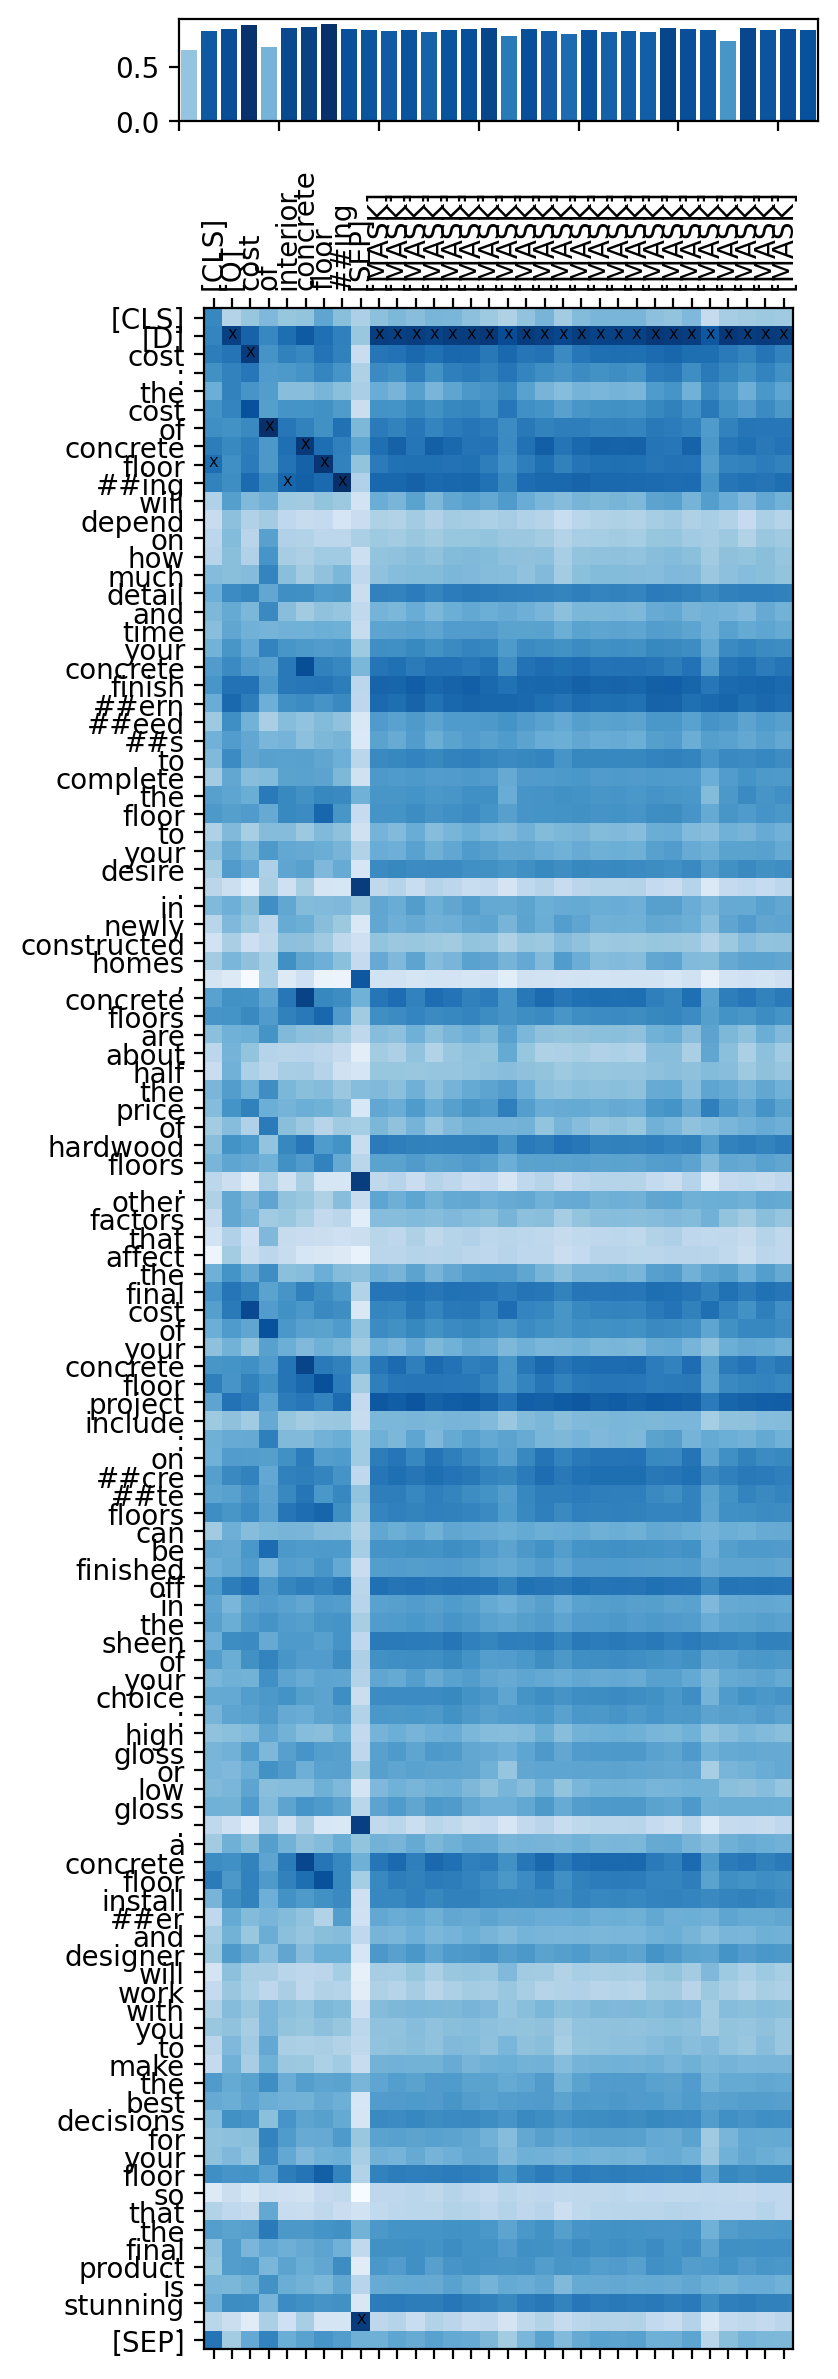

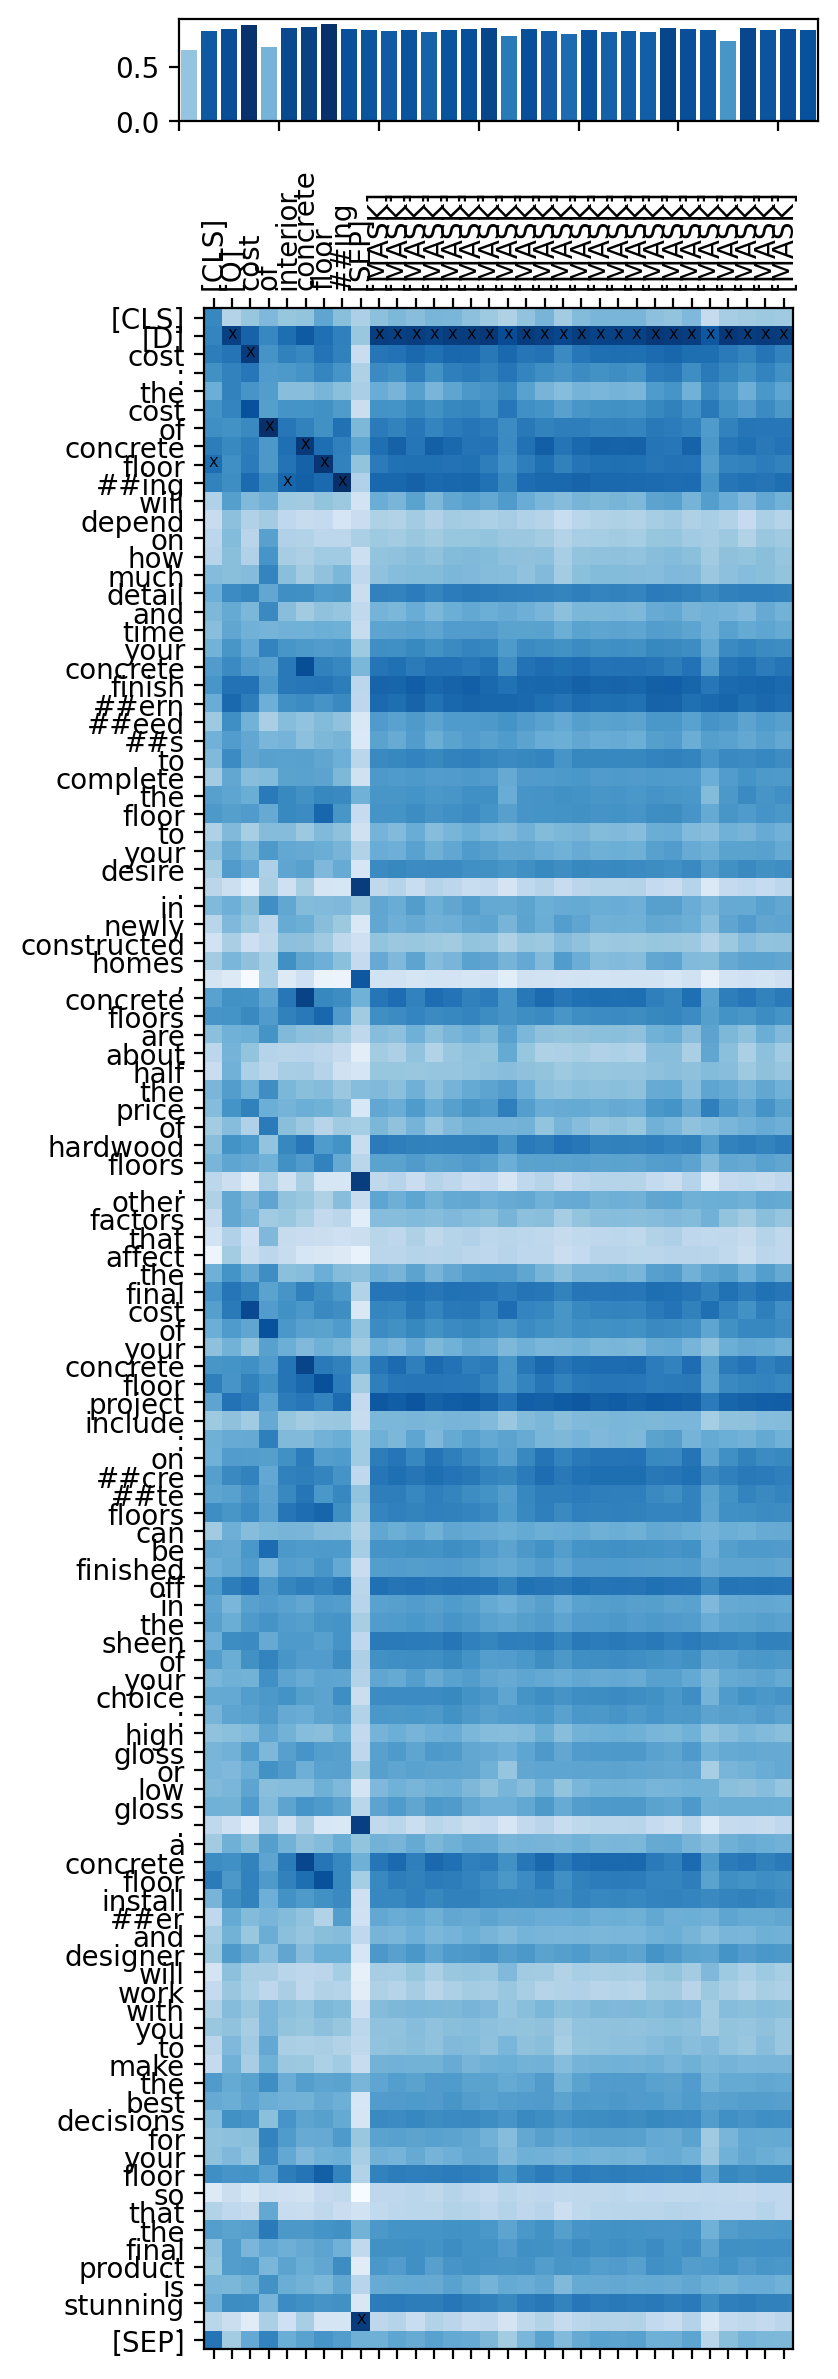

In [67]:
explain_text(colCondenser_factory, query=query, document = ColCondenser_doc)

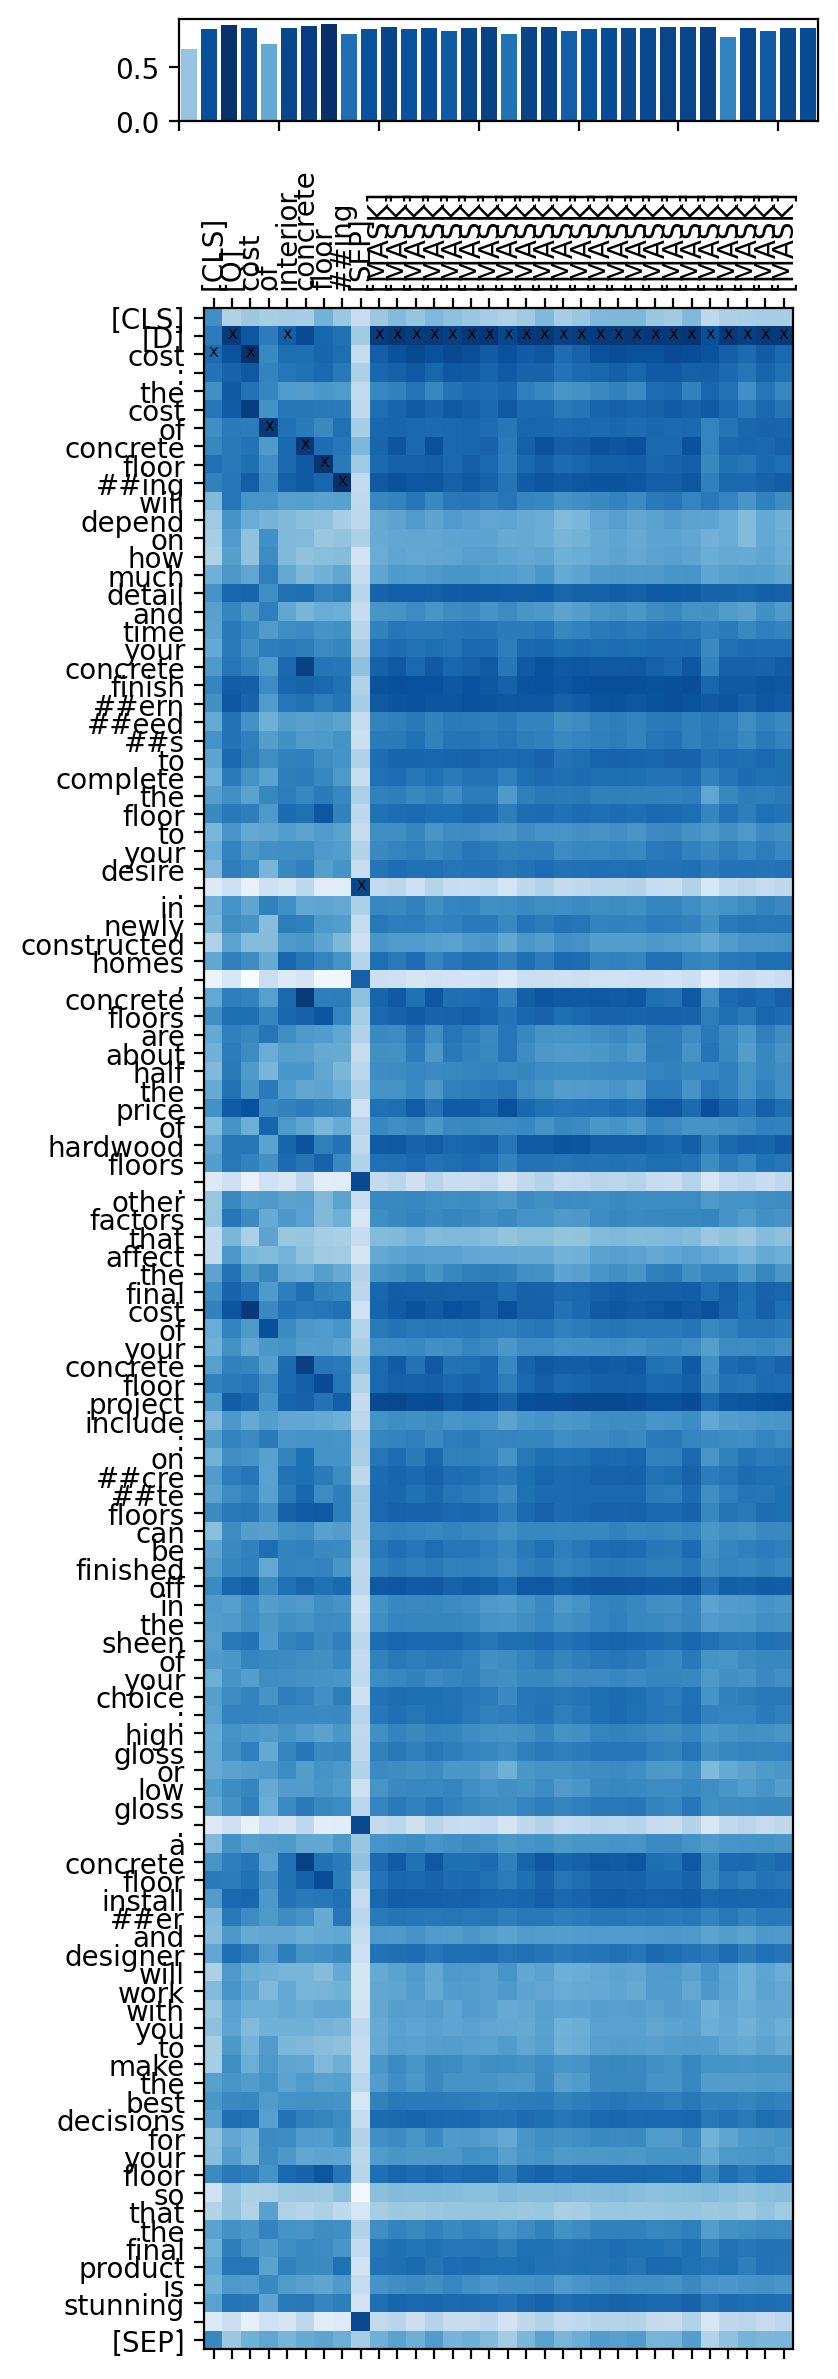

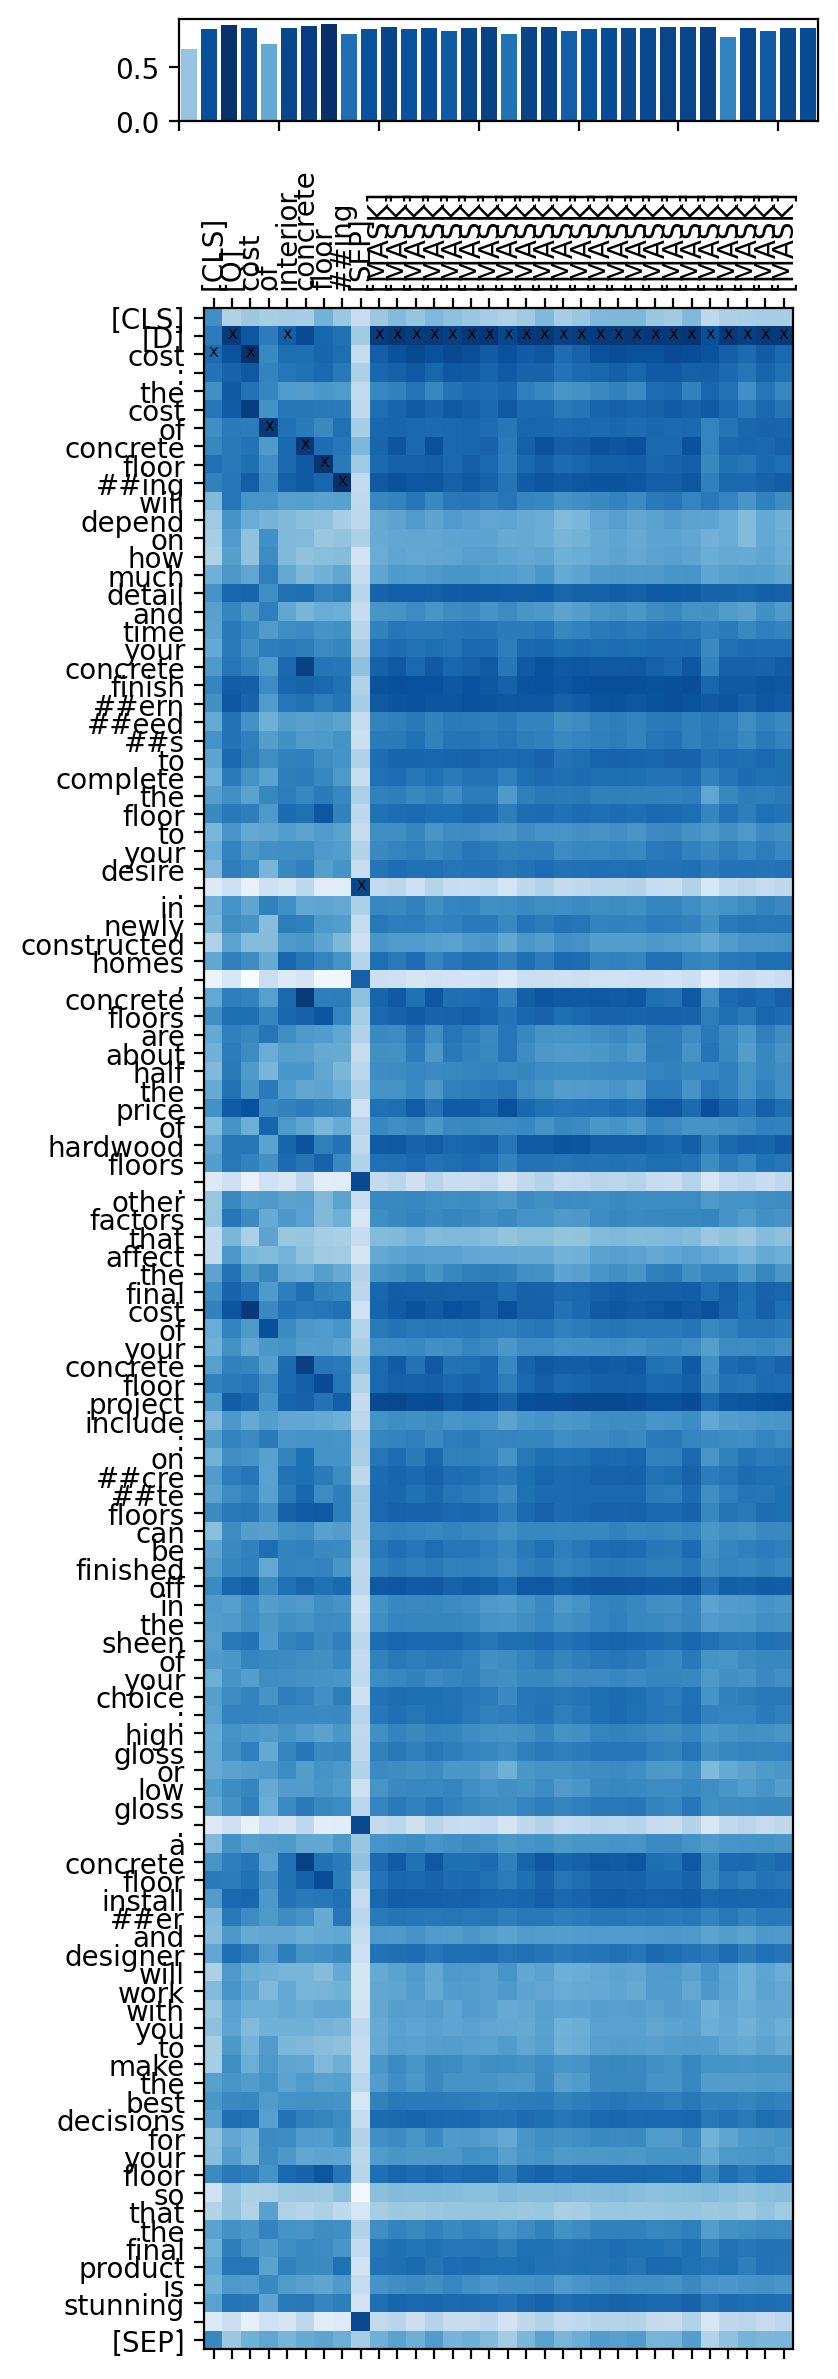

In [68]:
explain_text(colCondenser_hn_900_factory, query = query, document = ColCondenser_doc)

# **Per Query Effectiveness**


In [40]:
bs_df = pt.Experiment(
    [colCondenser_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> Craig_ColBERT'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
)

In [41]:
token_df = pt.Experiment(
    [colCondenser_hn_900_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['DPH >> ColCondenser_50K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
) 

In [42]:
token_df = token_df[token_df['value'].notnull()]
bs_df = bs_df[bs_df['value'].notnull()]

In [43]:
bs_df["delta"] =  token_df["value"] - bs_df["value"]
bs_df.head(5)
#bs_df = bs_df[np.abs(bs_df["delta"]) > 0.02]

,name,qid,measure,value,delta
0,DPH >> Craig_ColBERT,1037798,nDCG@10,0.335192,-0.142296
1,DPH >> Craig_ColBERT,104861,nDCG@10,0.485716,0.294192
2,DPH >> Craig_ColBERT,1063750,nDCG@10,0.414396,-0.034485
3,DPH >> Craig_ColBERT,1103812,nDCG@10,0.466419,0.004701
4,DPH >> Craig_ColBERT,1106007,nDCG@10,0.242096,0.000000


In [44]:
td_df = pt.get_dataset('msmarco_passage').get_topics('test-2019')
df3 = pd.merge(bs_df,td_df, how='left', on='qid')
sorted_df = df3.sort_values("delta", ascending=False)
sorted_df["qid:query"] = sorted_df["qid"] + ":" + sorted_df["query"]
sorted_df

,name,qid,measure,value,delta,query,qid:query
1,DPH >> Craig_ColBERT,104861,nDCG@10,0.485716,0.294192,cost of interior concrete flooring,104861:cost of interior concrete flooring
9,DPH >> Craig_ColBERT,1114819,nDCG@10,0.661203,0.110669,what is durable medical equipment consist of,1114819:what is durable medical equipment cons...
29,DPH >> Craig_ColBERT,405717,nDCG@10,0.548854,0.106425,is cdg airport in main paris,405717:is cdg airport in main paris
30,DPH >> Craig_ColBERT,443396,nDCG@10,0.138862,0.081229,lps laws definition,443396:lps laws definition
11,DPH >> Craig_ColBERT,1117099,nDCG@10,0.862143,0.059973,what is a active margin,1117099:what is a active margin
20,DPH >> Craig_ColBERT,148538,nDCG@10,0.304348,0.049641,difference between rn and bsn,148538:difference between rn and bsn
7,DPH >> Craig_ColBERT,1113437,nDCG@10,0.356843,0.039765,what is physical description of spruce,1113437:what is physical description of spruce
31,DPH >> Craig_ColBERT,451602,nDCG@10,0.279347,0.030698,medicare s definition of mechanical ventilation,451602:medicare s definition of mechanical ven...
37,DPH >> Craig_ColBERT,833860,nDCG@10,0.921032,0.027444,what is the most popular food in switzerland,833860:what is the most popular food in switze...
34,DPH >> Craig_ColBERT,490595,nDCG@10,0.517821,0.023655,rsa definition key,490595:rsa definition key


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

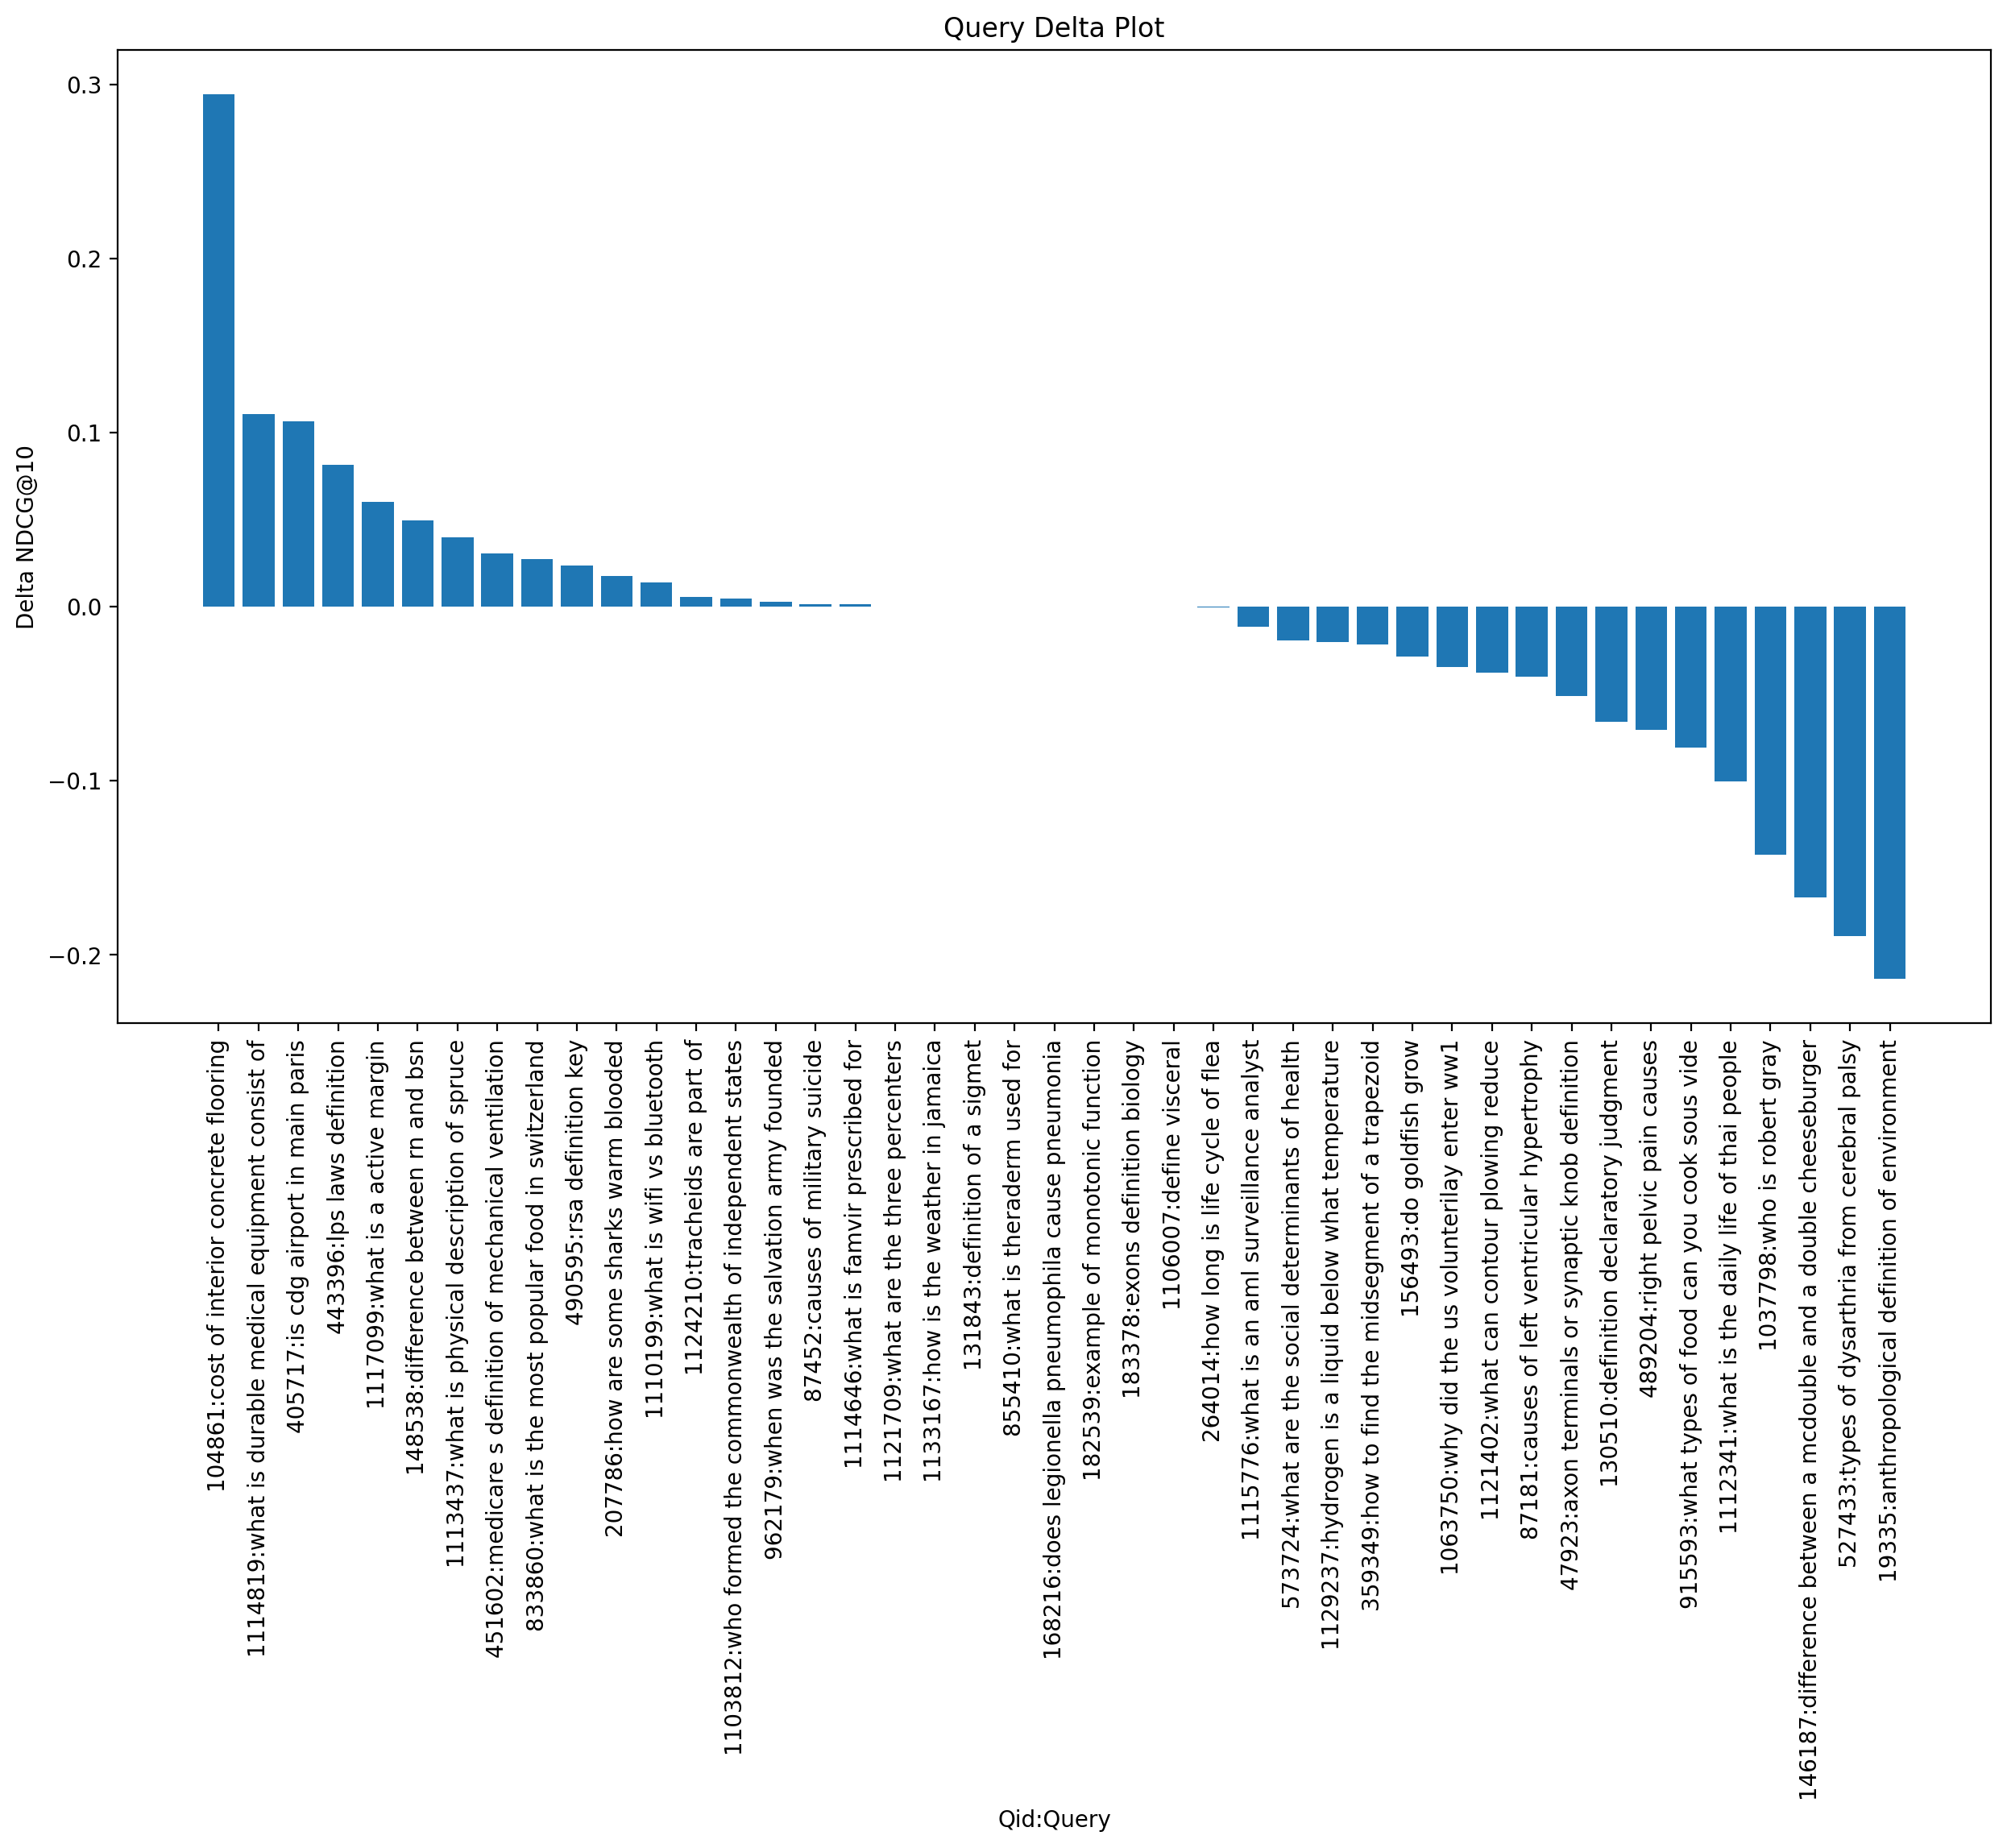

In [45]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.bar(sorted_df["qid:query"], sorted_df["delta"])
plt.title("Query Delta Plot")
plt.xlabel("Qid:Query")
plt.ylabel("Delta NDCG@10")
plt.xticks(rotation=90)

In [46]:
print("Improved Queries: ", sorted_df[sorted_df['delta']>0].count()[0])
print("Negative Impact Queries: ", sorted_df[sorted_df['delta']<0].count()[0])
print("Unchanged Queries: ", sorted_df[sorted_df['delta']==0].count()[0])

Improved Queries:  17
Negative Impact Queries:  18
Unchanged Queries:  8
